In [218]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [219]:
# 타이타닉 데이터셋에서 다양한 컬럼을 이용해서 연습(원핫인코딩)


In [220]:
#성별 0/1, 연령대 0/1/2 성적 0/1/2/3/4
data = np.array([[0,1,1],#여성 30대 B학점
             [0,2,2,],
             [1,0,3,],
             [1,1,4],
             [0,0,0]])
data

array([[0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4],
       [0, 0, 0]])

In [12]:
ohe=OneHotEncoder()
ohe.fit(data) #data 변수에 저장된 데이터에 맞추어(fit)서 이항변수화 시킴

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [15]:
ohe.active_features_
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)
#      [남/여/20/30/40/ A/ B/ C/ D/ F]
# 성별 0/1, 연령대 0/1/2 성적 0/1/2/3/4

ohe.n_values_ 
# array([2, 3, 5]) --> 각feature별로 범주가 몇개가 있느냐

ohe.feature_indices_
# array([ 0,  2,  5, 10], dtype=int32) --> 각 인덱스의 범위를 알려줌. 성별은 0이상 2미만/ 2이상 5미만/ 5이상 10미만

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


array([ 0,  2,  5, 10], dtype=int32)

In [17]:
# 여성 30대 D학점 ( 0, 1, 3) => 성별 0 -> 10 나이 1->010 학점 D - > 00010
test = np.array([[0,1,3]])
ohe.transform(test).toarray()


array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [ ]:
# np.digitizer(), np.where() : 연속형 변수 -> 이산화(2개 이상)
# 어떠한 데이터를 구간화 시키는 작업 필요

In [22]:
from pandas import DataFrame
np.random.seed(75)
df= DataFrame({
    'd1': np.random.randn(10),
    'd2':['x','x','x','x','x','y','y','y','y','y']
})
df

,d1,d2
0,-0.709502,x
1,0.112694,x
2,0.477022,x
3,1.935981,x
4,0.450415,x
5,-1.188847,y
6,0.613631,y
7,-0.178142,y
8,1.346521,y
9,1.161150,y


In [25]:
# df['d1'] #시리즈로 출력
# df[['df']] # 데이터 프레임으로 출력
# df.d1
bins = np.linspace(df.d1.min(), df.d1.max(), 5) #df['d1'].min()
#df['d1_bin'] = np.linspace()
bins

array([-1.18884736, -0.40764024,  0.37356688,  1.154774  ,  1.93598112])

In [27]:
# 구간화 --> 구간 단위로 연산이 가능하다.
df['d1_bin'] = np.digitize(df['d1'], bins) #디지타이즈 할 컬럼정보/ 
df

,d1,d2,d1_bin
0,-0.709502,x,1
1,0.112694,x,2
2,0.477022,x,3
3,1.935981,x,5
4,0.450415,x,3
5,-1.188847,y,1
6,0.613631,y,3
7,-0.178142,y,2
8,1.346521,y,4
9,1.161150,y,4


In [28]:
df.groupby('d1_bin')

In [ ]:
df.groupby('d1_bin')['d1'].size() ###################### 아주 유용한 함수 구문1

In [29]:
df.groupby('d1_bin')['d1'].size() #['d1']열에 대한 값의 (size)를 구해줌
df.groupby('d1_bin')['d1'].sum()
df.groupby('d1_bin')['d1'].mean()

d1_bin
1    2
2    2
3    3
4    2
5    1
Name: d1, dtype: int64

In [31]:
df.groupby('d1_bin')['d2'].vaule_counts() ###################### 아주 유용한 함수 구문2

AttributeError: 'SeriesGroupBy' object has no attribute 'vaule_counts'

In [33]:
# boolean 참조 함수 --> 트루 펄스를 다시 df에 넣으면 트루에 해당하는 애들만 나온다.
df['d1_bin']==3
df[df['d1_bin']==3]

,d1,d2,d1_bin
2,0.477022,x,3
4,0.450415,x,3
6,0.613631,y,3


In [ ]:
# np.where(조건식, 참일 때 수행구문, 거짓일 때 수행구문)
# np.where(조건식, 참일 때 수행구문, np.where(조건식, 참, 거짓일 때 수행구문))
# ...


In [37]:
df['d1']
df['d1'].mean()
df['hl'] = np.where(df['d1']>=df['d1'].mean(), 'High', 'LOW')
df

,d1,d2,d1_bin,hl
0,-0.709502,x,1,LOW
1,0.112694,x,2,LOW
2,0.477022,x,3,High
3,1.935981,x,5,High
4,0.450415,x,3,High
5,-1.188847,y,1,LOW
6,0.613631,y,3,High
7,-0.178142,y,2,LOW
8,1.346521,y,4,High
9,1.161150,y,4,High


In [39]:
df.groupby('hl')['d1'].size()
df.groupby('hl')['d1'].mean()
df.groupby('hl')['d1'].std()

hl
High    0.591084
LOW     0.576501
Name: d1, dtype: float64

In [44]:
Q1 = np.percentile(df['d1'],25) # 25% 지점
Q3 = np.percentile(df['d1'],75) # 25% 지점
Q3

# np.where을 사용하여 Q3보다 크거나 같으면 high Q1보다 크거나 같으면 medium 나머지는 low로
df['hll'] = np.where ( df['d1'] >= Q3, 'high', np.where(df['d1'] >= Q1, 'medium', 'low'))
df






,d1,d2,d1_bin,hl,hll
0,-0.709502,x,1,LOW,low
1,0.112694,x,2,LOW,medium
2,0.477022,x,3,High,medium
3,1.935981,x,5,High,high
4,0.450415,x,3,High,medium
5,-1.188847,y,1,LOW,low
6,0.613631,y,3,High,medium
7,-0.178142,y,2,LOW,low
8,1.346521,y,4,High,high
9,1.161150,y,4,High,high


In [47]:
data = np.arange(6).reshape(3,2)
data

array([[0, 1],
       [2, 3],
       [4, 5]])

In [50]:
# data를 2차항 변수화 시킨다
# x1, x2 => 1, x1, x2, x1^2, x1*x2, x2^2

#         x1  x2
# array([[0, 1], => 1, 0, 1, 0, 0, 1
#        [2, 3], => 1, 2, 3, 4, 6, 9
#        [4, 5]])

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit_transform(data)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [51]:
####### 기존의 데이터를 재구조화 #########
# pivot() pivot테이블 stack(데이터를 위에서아래로 쌓는) unstack(위아래 쌓여있던 데이터를 좌우로 나열)
# cross테이블 melt() widetolong()
# pivot table만이라도 잘쓰면 거의 다 됨!!

In [57]:
df = DataFrame({
    'c_id' : ['c1','c1','c1','c2','c2','c2','c3','c3','c3'],
    'p_id' : ['p1','p2','p3','p1','p2','p3','p1','p2','p3'],
    'amount' : [20,10,0,30,20,30,0,5,10],
    'reg' : ['S','S','S','S','S','S','A','A','A']
})
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
c_id      9 non-null object
p_id      9 non-null object
amount    9 non-null int64
reg       9 non-null object
dtypes: int64(1), object(3)
memory usage: 368.0+ bytes


In [54]:
# pivot 함수 버전
df.pivot(index='c_id', columns = 'p_id',values='amount' )

p_id,p1,p2,p3
c_id,,,
c1,20,10,0
c2,30,20,30
c3,0,5,10


In [55]:
# pivot 테이블 버전
df.pivot_table(index='c_id', columns = 'p_id',values='amount' )

p_id,p1,p2,p3
c_id,,,
c1,20,10,0
c2,30,20,30
c3,0,5,10


In [ ]:
# 피봇과 피봇테이블 함수의 차이 => 2 이상의 변수로 index를 삼고 싶은 경우
# 에러 발생 => df.pivot(index=['sido','dong'], columns = 'p_id',values='amount' )
# 잘 수행됨 => df.pivot_table(index=['sido','dong'], columns = 'p_id',values='amount' )

# 집계함수( 그룹단위로 sum, mean 등 함수) 사용 가능 여부에 따라
# pivot함수는 사용 불가, pivot_table은 사용 가능
# 잘 수행됨 => df.pivot_table(index=['sido','dong'], columns = 'p_id',values='amount', aggfunc = np.sum )


In [63]:
df

,c_id,p_id,amount,reg
0,c1,p1,20,S
1,c1,p2,10,S
2,c1,p3,0,S
3,c2,p1,30,S
4,c2,p2,20,S
5,c2,p3,30,S
6,c3,p1,0,A
7,c3,p2,5,A
8,c3,p3,10,A


In [68]:
#df.pivot(index=['reg'], columns = 'p_id',values='amount')
df.pivot_table(index=['reg'], columns = 'p_id',values='amount') #재구조화하면 default가 mean
df.pivot_table(index=['reg'], columns = 'p_id',values='amount', aggfunc = np.mean) 
df.pivot_table(index=['reg'], columns = 'p_id',values='amount', aggfunc = np.sum) 

p_id,p1,p2,p3
reg,,,
A,0,5,10
S,25,15,15


In [71]:
df1 = pd.read_csv("concat_1.csv")
df2 = pd.read_csv("concat_2.csv")
df3 = pd.read_csv("concat_3.csv")

In [73]:
row_concat= pd.concat([df1,df2,df3]) #df1, df2, df3 합침
row_concat
#row_concat의 4번째 행 추출 => index의 번호는 3
row_concat.iloc[3,]
row_concat.iloc[4,]
# iloc는 integer loc => 행 번호로 인덱싱하는 것!! iloc는 0부터 순서대로 행을 넘버링하여 저장함

A    a4
B    b4
C    c4
D    d4
Name: 0, dtype: object

In [74]:
new_row_series = pd.Series(['n1','n2','n3','n4'])
df1
#df1에 series를 연결

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [ ]:
# 시리즈를 df의 행으로 연결할 수 없다. => 시리즈는 열 이름이 없기 때문에 df의 행으로 연결할 수 없다
# 시리즈를 데이터프레임으로 만든 후에는 연결이 가능하다.
# concat은 두 개 이상의 DF를 연결할 수 있다
# append는 한 개의 DF만 가능하다

In [75]:
pd.concat([df1, new_row_series]) # concat은 위아래로 연결을 하는데, 시리즈와 df 타입은 연결할 때

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [77]:
new_row_df = pd.DataFrame([['n1','n2','n3','n4']],columns=['A','B','C','D'])
new_row_df

,A,B,C,D
0,n1,n2,n3,n4


In [78]:
pd.concat([df1,new_row_df])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [79]:
df1.append(new_row_df)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [83]:
# 딕셔너리로 한 행을 통째로 추가
data_dict = {'A':'n1','B':'n2','C':'n3','D':'n4'}
df1.append(data_dict, ignore_index=True)
rci = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
rci

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [87]:
col_concat=pd.concat([df1,df2,df3],axis=1)
col_concat
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [88]:
# stack() 
# unstack()

mi = pd.MultiIndex.from_tuples([('c1','2019'),('c1','2020'),('c2','2019'),('c2','2020')])
mi

MultiIndex(levels=[['c1', 'c2'], ['2019', '2020']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [98]:
DataFrame(np.arange(16).reshape(4,4))
df = DataFrame(np.arange(16).reshape(4,4), index=mi,
      columns=['p1','p2','p3','p4']) # 튜플에 c1,c2가 상위 그룹, 2019,2020이 하위 그룹으로 들어감
df
ds = df.stack()
ds
type(ds)
ds.index
ds

c1  2019  p1     0
          p2     1
          p3     2
          p4     3
    2020  p1     4
          p2     5
          p3     6
          p4     7
c2  2019  p1     8
          p2     9
          p3    10
          p4    11
    2020  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [103]:
ds['c1']
ds['c1']['2020']
ds['c1']['2020']['p1']
ds['c1']['2020'][['p1','p2']]

p1    4
p2    5
dtype: int32

In [108]:
df.ix['c2']
df.ix['c2','p4']
df.ix['c2','p4'] = np.nan
df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing 

p1  p2  p3   p4
c1 2019   0   1   2  3.0
   2020   4   5   6  7.0
c2 2019   8   9  10  NaN
   2020  12  13  14  NaN

In [110]:
df.stack() # nan이 출력안됨 --> dropna = True 가 default
df.stack(dropna = False)

c1  2019  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2020  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2019  p1     8.0
          p2     9.0
          p3    10.0
          p4     NaN
    2020  p1    12.0
          p2    13.0
          p3    14.0
          p4     NaN
dtype: float64

In [112]:
ds
ds.unstack()

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [116]:
# unstack()에서 level을 다르게 함으로써, columns의 순서를 바꿔준다.

print(ds.unstack(-1)) # unstack에 level이라는 요소의 default가 -1
print(ds.unstack(0))
print(ds.unstack(1))

         p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15
         c1  c2
2019 p1   0   8
     p2   1   9
     p3   2  10
     p4   3  11
2020 p1   4  12
     p2   5  13
     p3   6  14
     p4   7  15
       2019  2020
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15


In [117]:
df = DataFrame({'cid':['c1','c1','c2','c2'],
          'pcd':['p1','p2','p1','p2'],
          'pcnt':[1,2,3,4],
          'pamt':[10,20,30,40]})
df

,cid,pcd,pcnt,pamt
0,c1,p1,1,10
1,c1,p2,2,20
2,c2,p1,3,30
3,c2,p2,4,40


In [ ]:
# melt를 사용하여 기존 칼럼이 value로 들어간다

In [118]:
pd.melt(df) 
# melt(녹이려는 데이터프레임) --> 기존 칼럼이름은 사라지고, variable, value라는 default 칼럼생성됨 
                        #     --> 기존 칼럼은 variable로 들어가고, 기존의 vaule값들이 value로 들어감

,variable,value
0,cid,c1
1,cid,c1
2,cid,c2
3,cid,c2
4,pcd,p1
5,pcd,p2
6,pcd,p1
7,pcd,p2
8,pcnt,1
9,pcnt,2


In [119]:
pd.melt(df, id_vars =['cid','pcd']) # id_vars는 기존 칼럼에서 녹이지않고, 살려둘 칼럼명을 넣는다

,cid,pcd,variable,value
0,c1,p1,pcnt,1
1,c1,p2,pcnt,2
2,c2,p1,pcnt,3
3,c2,p2,pcnt,4
4,c1,p1,pamt,10
5,c1,p2,pamt,20
6,c2,p1,pamt,30
7,c2,p2,pamt,40


In [120]:
pd.melt(df, id_vars =['cid','pcd'], var_name='pname',value_name='vname')

,cid,pcd,pname,vname
0,c1,p1,pcnt,1
1,c1,p2,pcnt,2
2,c2,p1,pcnt,3
3,c2,p2,pcnt,4
4,c1,p1,pamt,10
5,c1,p2,pamt,20
6,c2,p1,pamt,30
7,c2,p2,pamt,40


In [122]:
df=DataFrame({'id':['id1','id1','id1','id2','id2','id3'],
             'd1':['a','a','a','b','b','b'],
             'd2':['d','d','d','c','c','d']})
df

,id,d1,d2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [ ]:
# crossTable  --> 특정 column 값을 행, 열로 지정하여 조건을 만족하는 value를 count

In [126]:
pd.crosstab(index=df.d1,columns=df.d2) # default

d2,c,d
d1,,
a,0,3
b,2,1


In [127]:
pd.crosstab(df.id, df.d1)

d1,a,b
id,,
id1,3,0
id2,0,2
id3,0,1


In [138]:
df = pd.read_csv('gapminder.tsv',sep='\t')
df
df.shape
df.columns
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [144]:
country_df = df['country']
country_df
country_df.head()
country_df.tail()

# 상관분석
df[['country','continent','year']]

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
5,Afghanistan,Asia,1977
6,Afghanistan,Asia,1982
7,Afghanistan,Asia,1987
8,Afghanistan,Asia,1992
9,Afghanistan,Asia,1997


In [145]:
# loc : 인덱스 기준으로 행 데이터 추출
# iloc : 행 번호를 기준으로 추출 --> index 아닌 컴터자체적으로 넘버링된 integer 번호 

df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [150]:
df.loc[0]
df.iloc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [153]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows -1
df.loc[last_row_index]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [ ]:
# df.loc[-1]은 불가능
# df.iloc[-1]은 맨 뒷 행의 정보

In [155]:
# df.loc[ : , ]
subset = df.loc[ : , ['year','pop']]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [160]:
df.iloc[:,]
df.iloc[:,[2,4]]
df.iloc[:,[2,4,-1]]

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106
5,1977,14880372,786.113360
6,1982,12881816,978.011439
7,1987,13867957,852.395945
8,1992,16317921,649.341395
9,1997,22227415,635.341351


In [161]:
s_range = list(range(5))
df.iloc[:,s_range]

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460
5,Afghanistan,Asia,1977,38.438,14880372
6,Afghanistan,Asia,1982,39.854,12881816
7,Afghanistan,Asia,1987,40.822,13867957
8,Afghanistan,Asia,1992,41.674,16317921
9,Afghanistan,Asia,1997,41.763,22227415


In [168]:
#년도별 기대수명의 전체 평균
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [170]:
# df[df['country'] == 'Afghanistan']

df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()


lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [171]:
# 대륙별 국가가 몇 개씩 있는지 
# nunique() : 

df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

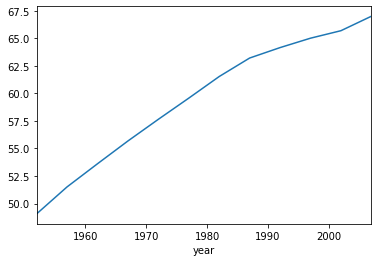

In [174]:
# 시각화 
gyle = df.groupby('year')['lifeExp'].mean()
gyle
gyle.plot()

In [176]:
scientist = pd.read_csv("scientists.csv")
scientist

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [181]:
ages = scientist['Age']
ages.max()

# 평군보다 큰 나이만 출력 --> 불린 참조방식으로
# scientist[(ages>ages.mean())]
ages[(ages>ages.mean())]



1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [185]:
ages.sort_index()

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [189]:
ages.sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [186]:
ages.sort_values()

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [188]:
ages.sort_values(ascending=False)

2    90
7    77
3    66
1    61
4    56
5    45
6    41
0    37
Name: Age, dtype: int64

In [190]:
scientist.dtypes

Name          object
Born          object
Died          object
Age            int64
Occupation    object
dtype: object

In [197]:
bd = pd.to_datetime(scientist['Born'])
type(bd)

pandas.core.series.Series

In [202]:
scientist
# 파생변수 Died, Born 날짜 형식인데,
# 칼럼을 추가해서 살아온 날짜를 구하고 싶다면?

born_dt = pd.to_datetime(scientist['Born'],format='%Y-%m-%d')
died_df = pd.to_datetime(scientist['Died'],format='%Y-%m-%d')
scientist['born_dt'] = born_dt
scientist['died_df'] = died_df

scientist['age_days'] = scientist['died_df'] - scientist['born_dt']
scientist

,Name,Born,Died,Age,Occupation,born_dt,died_df,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [204]:
scientist.columns
scientist.drop(['Age'],axis=1)

,Name,Born,Died,Occupation,born_dt,died_df,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days


In [238]:
# 정규 표현식 
import seaborn as sns # 패키지 안에 연습용 dataset이 제공됨
anscombe=sns.load_dataset("anscombe")
anscombe
anscombe.head()
# 통계치의 함정 --> 평균/ 분산/상관관계/회귀선 모두가 같은 데이터 4종류 제공

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


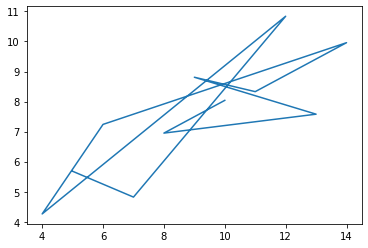

In [241]:
dataset_1=anscombe[anscombe['dataset']=='I'] #true 데이터 추출
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(dataset_1['x'],dataset_1['y'])

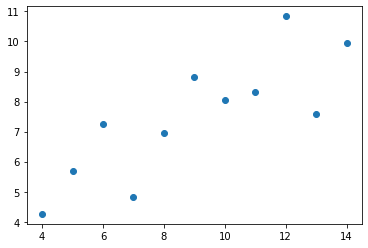

In [242]:
plt.plot(dataset_1['x'],dataset_1['y'],'o')

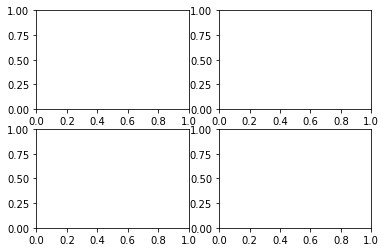

In [243]:
fig = plt.figure()
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

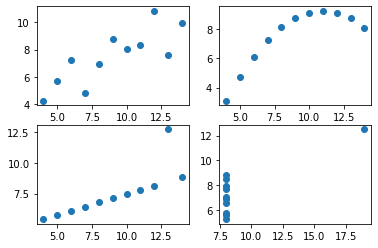

In [244]:
axes1.plot(dataset_1['x'],dataset_1['y'],'o')
axes2.plot(dataset_2['x'],dataset_2['y'],'o')
axes3.plot(dataset_3['x'],dataset_3['y'],'o')
axes4.plot(dataset_4['x'],dataset_4['y'],'o')
fig

In [226]:
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

Text(0.5, 1, 'dataset_4')